## Mayank Raj 
### 22BAI1118
##### Multiclass Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

2024-10-08 10:54:53.597253: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-08 10:54:53.598509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 10:54:53.624004: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 10:54:53.624505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 10:54:54.074909: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import pandas as pd

df = pd.read_excel('MultiClass-dataset.xlsx')

print(df.head())


   S.No    SL    RT   FL  SL.1  CTL   LW Type
0     1  17.0   7.0  4.2  12.7  4.3  0.3   KK
1     2  15.3  27.0  2.2  11.0  4.3  0.3   KK
2     3  18.0  29.5  3.7  12.7  5.2  0.3   KK
3     4  13.2   9.5  2.8   9.2  4.2  0.2   KK
4     5  15.5  27.2  2.3  11.0  4.1  0.2   KK


In [3]:
num_classes = df['Type'].nunique()
print(f"Number of unique classes in the 'Type' column: {num_classes}")

Number of unique classes in the 'Type' column: 12


In [4]:
df.shape

(135, 8)

## Dataset Discription
The MultiClass-dataset file contains a small sample of a larger dataset, likely related to measurements or ratings across different categories. It consists of six numeric features (SL, RT, FL, SL.1, CTL, LW) and a categorical target variable 'Type'. The dataset has 12 unique classes, represented by letters . The exact number of total rows and columns is (127, 8). 

## Preprocessing
I dropped rows with any missing values using df.dropna() to clean the dataset. Then, I reset the dataframe to the cleaned version. Next, I encoded the 'Type' column using LabelEncoder to transform categorical values into numerical labels. After encoding, I separated the features (X) containing numeric columns SL, RT, FL, SL.1, CTL, LW, and set y as the encoded 'Type' column. Finally, I one-hot encoded the target variable y using to_categorical() to convert class labels into binary vectors suitable for classification tasks.

This preprocessing ensured my data was clean, properly encoded, and ready for model training. It also gave me informative print statements about the data transformation process.

In [5]:

df_clean = df.dropna()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_clean))
df=df_clean


Number of rows before cleaning: 135
Number of rows after cleaning: 127


In [6]:
df.tail()

,S.No,SL,RT,FL,SL.1,CTL,LW,Type
130,131,17.7,32.5,4.6,12.4,5.3,0.3,KSB
131,132,19.0,31.2,3.7,14.2,5.0,0.3,KSB
132,133,17.5,21.6,4.2,12.0,5.4,0.3,KSB
133,134,13.5,22.1,5.2,8.9,5.0,0.3,KSB
134,135,11.5,23.1,5.0,7.1,4.5,0.3,KSB


In [7]:

le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

X = df[['SL', 'RT', 'FL', 'SL.1', 'CTL', 'LW']]
y = df['Type']
y = to_categorical(y)

In [8]:
df.head()

,S.No,SL,RT,FL,SL.1,CTL,LW,Type
0,1,17.0,7.0,4.2,12.7,4.3,0.3,2
1,2,15.3,27.0,2.2,11.0,4.3,0.3,2
2,3,18.0,29.5,3.7,12.7,5.2,0.3,2
3,4,13.2,9.5,2.8,9.2,4.2,0.2,2
4,5,15.5,27.2,2.3,11.0,4.1,0.2,2


## Visualization

IndexError: index 2 is out of bounds for axis 1 with size 2

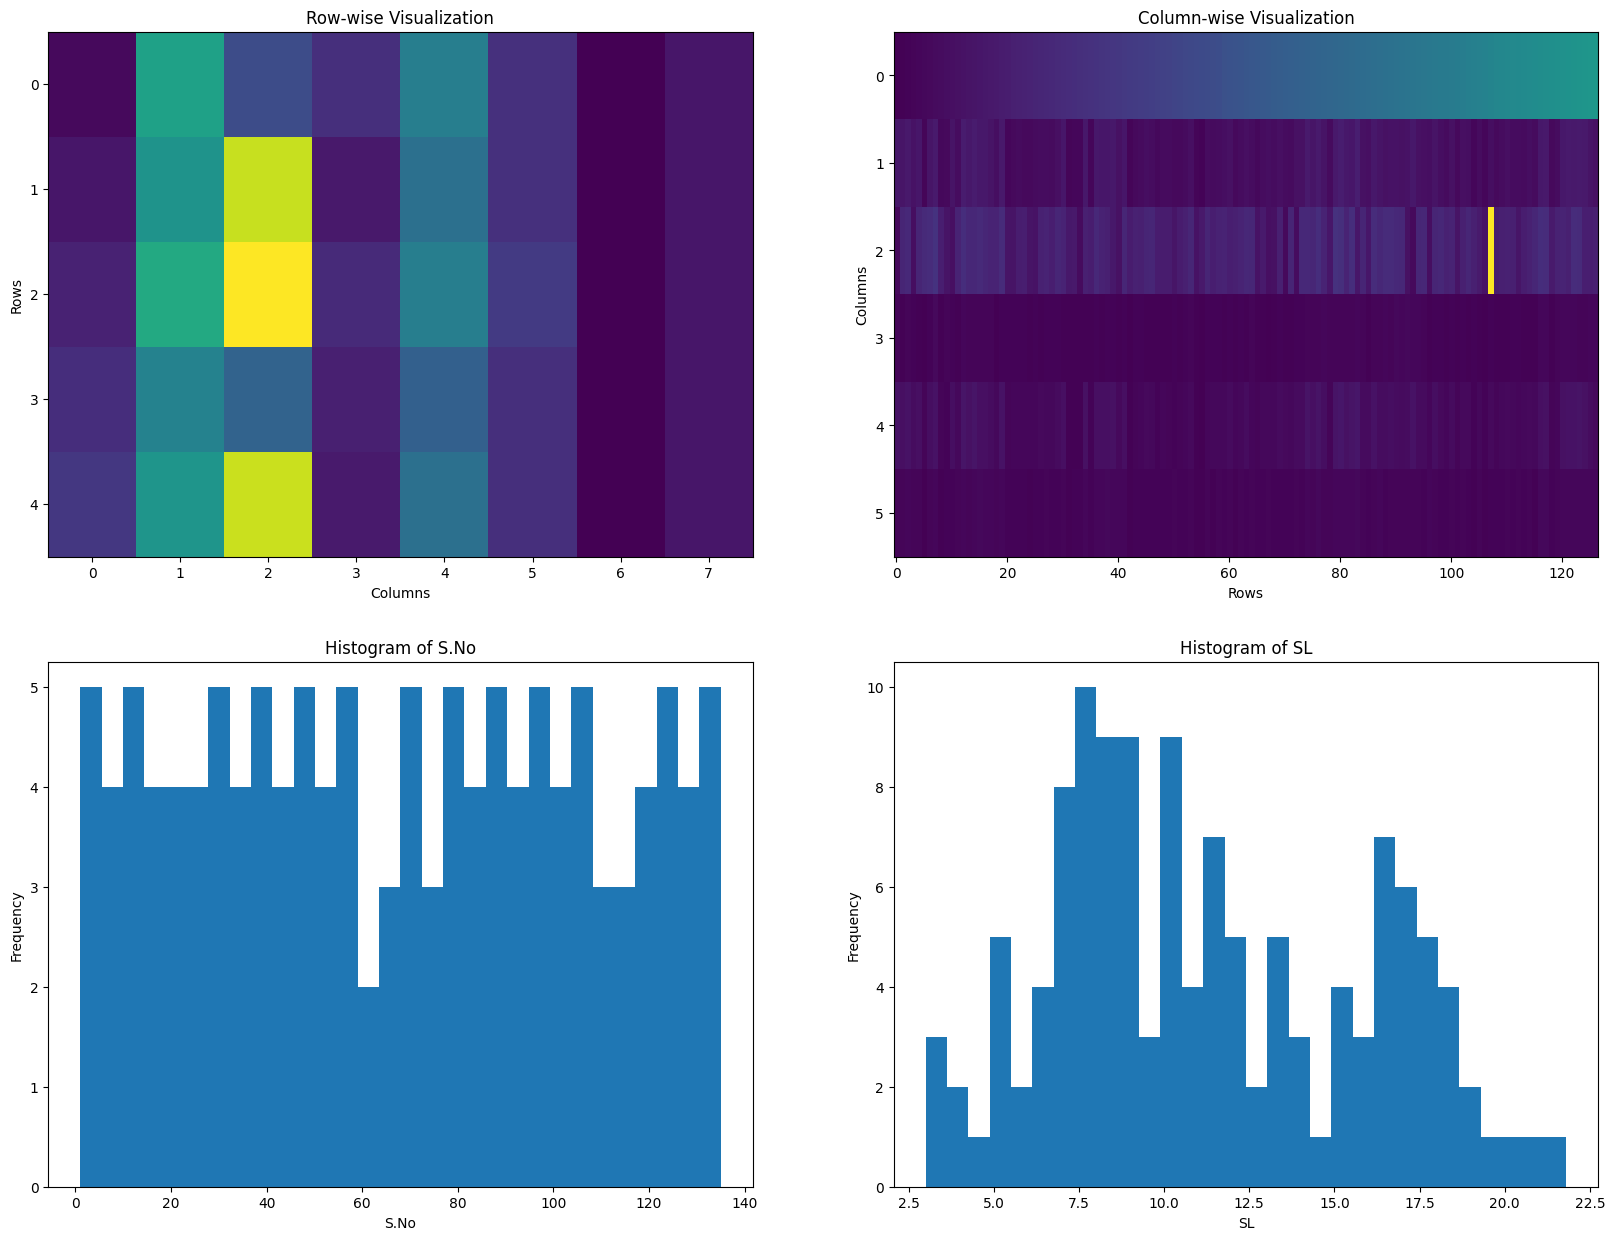

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(20, 15))

axes[0, 0].imshow(df.iloc[:5, :].values, aspect='auto')
axes[0, 0].set_title('Row-wise Visualization')
axes[0, 0].set_xlabel('Columns')
axes[0, 0].set_ylabel('Rows')

axes[0, 1].imshow(df.iloc[:, :6].values.T, aspect='auto')
axes[0, 1].set_title('Column-wise Visualization')
axes[0, 1].set_xlabel('Rows')
axes[0, 1].set_ylabel('Columns')

numeric_columns = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_columns):
    ax = axes[1, i]
    ax.hist(df[col], bins=30)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        top_values = df[col].value_counts().head(5).index.tolist()
        counts = df[col].value_counts().head(5).values
        ax = axes[1, i]
        ax.bar(top_values, counts)
        ax.set_title(f'Top 5 Values in {col}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning)


In [10]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MPL 1

In [11]:

def create_mlp(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(len(le.classes_), activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model
model_1 = create_mlp((6,))
model_1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

test_loss, test_acc = model_1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

y_pred = model_1.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_class))

2024-10-08 10:54:58.696483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 10:54:58.697551: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
2/2 [==============================] - 1s 111ms/step - loss: 8.4152 - accuracy: 0.0792 - val_loss: 4.3974 - val_accuracy: 0.0769
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 7.2381 - accuracy: 0.0495 - val_loss: 3.9680 - val_accuracy: 0.0769
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 6.9824 - accuracy: 0.0594 - val_loss: 3.6248 - val_accuracy: 0.0769
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 5.7632 - accuracy: 0.0990 - val_loss: 3.3744 - val_accuracy: 0.0769
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 5.3468 - accuracy: 0.0693 - val_loss: 3.2042 - val_accuracy: 0.0769
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 5.4022 - accuracy: 0.0891 - val_loss: 3.0596 - val_accuracy: 0.0769
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 4.0612 - accuracy: 0.0990 - val_loss: 2.9568 - val_accuracy: 0.0385
Epoch 8/100
2/2 [==

/home/ex5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ex5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ex5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ex5/.local/lib/python3.8/site-packages/sklearn/metr

In [12]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0     

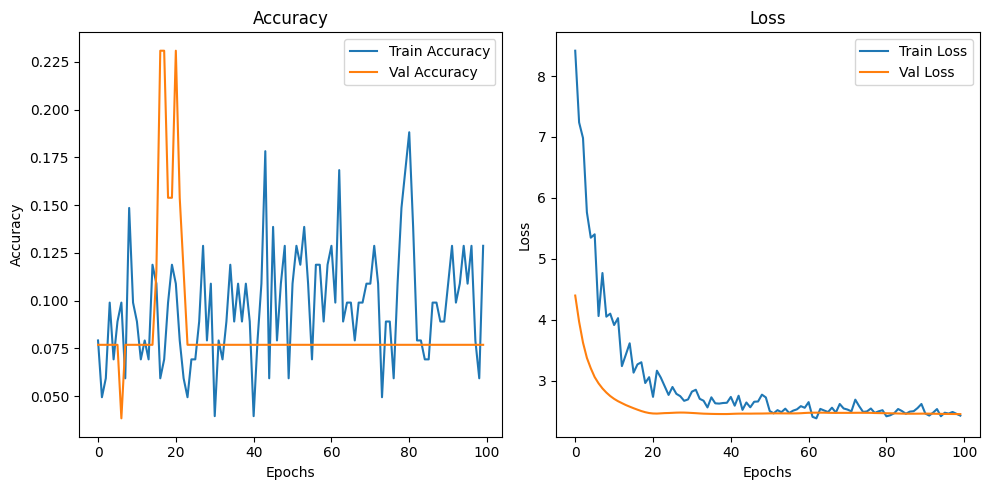

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# MPL 2

In [14]:
def create_mlp_2(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.4)(x)
    
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    outputs = Dense(len(le.classes_), activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

model_2 = create_mlp_2((6,))
model_2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

y_pred = model_2.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_class))

Epoch 1/100
2/2 [==============================] - 1s 95ms/step - loss: 4.0256 - accuracy: 0.0594 - val_loss: 2.7653 - val_accuracy: 0.0769
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 3.3987 - accuracy: 0.1089 - val_loss: 2.6984 - val_accuracy: 0.0769
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 3.2318 - accuracy: 0.1188 - val_loss: 2.5254 - val_accuracy: 0.0769
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 3.3497 - accuracy: 0.0792 - val_loss: 2.4470 - val_accuracy: 0.1538
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 3.2968 - accuracy: 0.0891 - val_loss: 2.4271 - val_accuracy: 0.0769
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 3.2035 - accuracy: 0.0990 - val_loss: 2.4320 - val_accuracy: 0.1538
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 2.9542 - accuracy: 0.1089 - val_loss: 2.4460 - val_accuracy: 0.1538
Epoch 8/100
2/2 [===

/home/ex5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ex5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ex5/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ex5/.local/lib/python3.8/site-packages/sklearn/metr

In [15]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0   

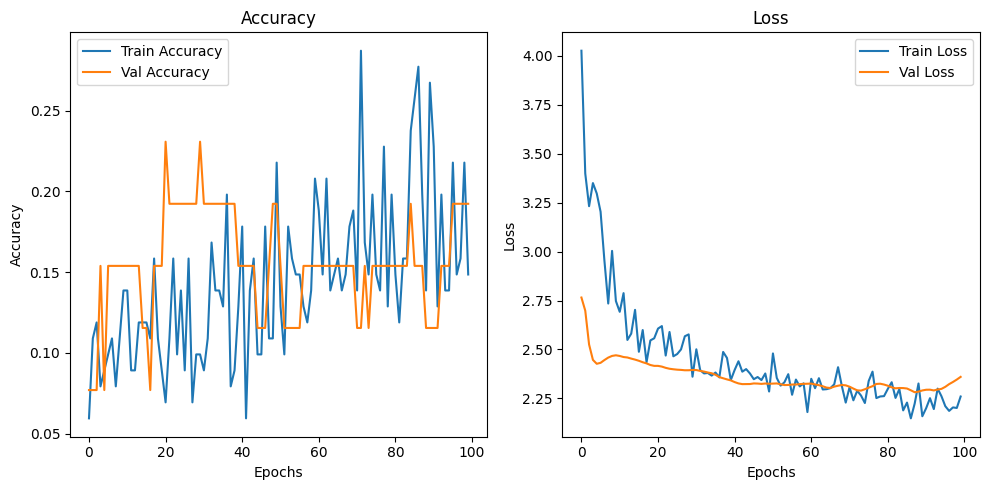

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Changes in both models:
 The first model, create_mlp(), has a simpler structure with three hidden layers: 64 neurons in the first layer, 32 in the second, and 16 in the third. It uses a dropout rate of 0.3 for each layer. In contrast, the second model, create_mlp_2(), has a much more complex architecture. It starts with a wider first layer of 128 neurons, then expands to 256 neurons in the second layer, followed by 512 neurons in the third, and finally 1024 neurons in the fourth. The dropout rate is increased to 0.4 for all layers. This second model is significantly deeper and more complex, suggesting it's designed to capture more intricate patterns in the data. The softmax output layer remains consistent in both models, indicating they're both intended for multi-class classification tasks. Overall, the second model trades simplicity for increased capacity, which could potentially allow it to learn more complex patterns but also risks overfitting if not carefully managed.

## Concusion
Given these results, I'd conclude that Model 1 appeared slightly better overall, with its simpler architecture generalizing better to unseen data.